<a href="https://colab.research.google.com/github/baasitsharief/kaggle_digit_recognizer/blob/master/Digit_Recognizer_using_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


sns.set(style='white', context='notebook', palette='deep')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

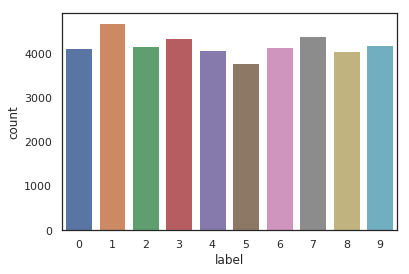

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Y_train_orig = train["label"]
X_train_orig = train.drop(labels = ["label"],axis = 1)

del train

g = sns.countplot(Y_train_orig)

Y_train_orig.value_counts()

In [0]:
#np.size((Y_train_orig.values))
#Y_train_orig.shape
test.shape

(28000, 28, 28, 1)

In [0]:
X_train_orig = X_train_orig/255
test = test/255

In [0]:
#Reshape
X_train_orig = X_train_orig.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
Y_train_orig = to_categorical(Y_train_orig, num_classes = 10)
random_seed = 2
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_orig, Y_train_orig, test_size = 0.1,random_state = random_seed)

With Keras/Tensorflow

In [0]:
def DigitModel(input_shape):
  X_input = Input(input_shape)
  X = X_input
  
  #Layer 1 - Conv>BN>RELU>MaxPool
  
  X = Conv2D(6,(5,5),strides = (1,1), name = 'conv0', padding = 'same')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2),strides = (2,2), name = 'maxpool0')(X)
  
  #Layer 2 - Conv>BN>RELU>MaxPool
  
  X = Conv2D(16,(5,5),strides = (1,1), name = 'conv1', padding = 'valid')(X)
  X = BatchNormalization(axis = 3, name = 'bn1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2),strides = (2,2), name = 'maxpool1')(X)
  
  #FC layers with flattening
  
  X = Flatten()(X)
  X = Dense(120, activation = 'relu', name = 'fc1')(X)
  X = Dense(84, activation = 'relu', name = 'fc2')(X)
  X = Dense(10, activation = 'softmax', name = 'preds')(X)
  
  #model instance creator
  model = Model(inputs = X_input, outputs = X, name = 'DigitModel')
  
  return model

In [0]:
#Initialize the model

### START CODE HERE ### (1 line)
input_shape = X_train.shape[1:4]
recog = DigitModel(input_shape)
### END CODE HERE ###

In [0]:
#Compile model to configure learning process
recog.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])

In [0]:
#train the model
recog.fit(x=X_train, y=Y_train, epochs = 30, batch_size = 86)

Epoch 1/30
37800/37800 [==============================] - 35s 922us/step - loss: 0.2292 - acc: 0.9285
Epoch 2/30
37800/37800 [==============================] - 33s 886us/step - loss: 0.0683 - acc: 0.9789
Epoch 3/30
37800/37800 [==============================] - 34s 892us/step - loss: 0.0466 - acc: 0.9846
Epoch 4/30
37800/37800 [==============================] - 34s 887us/step - loss: 0.0356 - acc: 0.9888
Epoch 5/30
37800/37800 [==============================] - 34s 890us/step - loss: 0.0324 - acc: 0.9896
Epoch 6/30
37800/37800 [==============================] - 34s 889us/step - loss: 0.0268 - acc: 0.9913
Epoch 7/30
37800/37800 [==============================] - 34s 893us/step - loss: 0.0236 - acc: 0.9923
Epoch 8/30
37800/37800 [==============================] - 34s 892us/step - loss: 0.0204 - acc: 0.9931
Epoch 9/30
37800/37800 [==============================] - 33s 886us/step - loss: 0.0177 - acc: 0.9945
Epoch 10/30
37800/37800 [==============================] - 34s 892us/step - loss: 

In [0]:
preds = recog.evaluate(x = X_dev, y = Y_dev)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4200/4200 [==============================] - 2s 380us/step

Loss = 0.11258045457626287
Test Accuracy = 0.9785714285714285


In [0]:
y_test_set = recog.predict(test)



0        2
1        0
2        9
3        9
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    7
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [0]:
#Getting the required desired matrix from max_indices
results = np.argmax(y_test_set,axis = 1)
#print(results)

#Creating the submission Dataframe
result = pd.DataFrame({'Label' : results })
result_id = pd.DataFrame({'ImageId' : range(1,28001)})
#print(result_id)
result = pd.concat([result_id,result], axis = 1)
#print(result)

#Saving into a CSV file
result.to_csv("submission.csv", index = False)
print(result)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2